# Numerical Differentiation

## Introduction

Numerical differentiation is a fundamental technique in computational mathematics for approximating derivatives of functions when analytical differentiation is impractical or impossible. This notebook explores the theoretical foundations and practical implementations of finite difference methods.

## Theoretical Background

### Taylor Series Expansion

The foundation of numerical differentiation lies in the Taylor series expansion. For a sufficiently smooth function $f(x)$, we can write:

$$f(x + h) = f(x) + hf'(x) + \frac{h^2}{2!}f''(x) + \frac{h^3}{3!}f'''(x) + \mathcal{O}(h^4)$$

Similarly:

$$f(x - h) = f(x) - hf'(x) + \frac{h^2}{2!}f''(x) - \frac{h^3}{3!}f'''(x) + \mathcal{O}(h^4)$$

### Finite Difference Formulas

#### Forward Difference

Rearranging the first Taylor expansion:

$$f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{h}{2}f''(\xi)$$

The **forward difference approximation** is:

$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

This has a truncation error of $\mathcal{O}(h)$.

#### Backward Difference

Similarly, the **backward difference approximation** is:

$$f'(x) \approx \frac{f(x) - f(x-h)}{h}$$

Also with truncation error $\mathcal{O}(h)$.

#### Central Difference

Subtracting the two Taylor expansions:

$$f(x+h) - f(x-h) = 2hf'(x) + \frac{2h^3}{3!}f'''(x) + \mathcal{O}(h^5)$$

The **central difference approximation** is:

$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$

This has a truncation error of $\mathcal{O}(h^2)$, making it more accurate than forward or backward differences.

### Second Derivative

Adding the two Taylor expansions:

$$f(x+h) + f(x-h) = 2f(x) + h^2 f''(x) + \mathcal{O}(h^4)$$

The **central difference for the second derivative** is:

$$f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}$$

with truncation error $\mathcal{O}(h^2)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define finite difference functions
def forward_difference(f, x, h):
    """Forward difference approximation of the first derivative."""
    return (f(x + h) - f(x)) / h

def backward_difference(f, x, h):
    """Backward difference approximation of the first derivative."""
    return (f(x) - f(x - h)) / h

def central_difference(f, x, h):
    """Central difference approximation of the first derivative."""
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative_central(f, x, h):
    """Central difference approximation of the second derivative."""
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h ** 2)

## Test Function

We will test our numerical differentiation methods using the function:

$$f(x) = \sin(x)$$

The analytical derivatives are:

$$f'(x) = \cos(x)$$
$$f''(x) = -\sin(x)$$

This allows us to compute exact errors for our approximations.

In [2]:
# Test function and its analytical derivatives
def f(x):
    return np.sin(x)

def f_prime(x):
    return np.cos(x)

def f_double_prime(x):
    return -np.sin(x)

# Test point
x0 = 1.0

# Range of step sizes
h_values = np.logspace(-10, 0, 100)

# Compute errors for each method
forward_errors = np.abs(forward_difference(f, x0, h_values) - f_prime(x0))
backward_errors = np.abs(backward_difference(f, x0, h_values) - f_prime(x0))
central_errors = np.abs(central_difference(f, x0, h_values) - f_prime(x0))
second_deriv_errors = np.abs(second_derivative_central(f, x0, h_values) - f_double_prime(x0))

print(f"Test point: x = {x0}")
print(f"Exact f'({x0}) = {f_prime(x0):.10f}")
print(f"Exact f''({x0}) = {f_double_prime(x0):.10f}")
print("\nSample approximations with h = 0.01:")
h_sample = 0.01
print(f"Forward difference:  {forward_difference(f, x0, h_sample):.10f}")
print(f"Backward difference: {backward_difference(f, x0, h_sample):.10f}")
print(f"Central difference:  {central_difference(f, x0, h_sample):.10f}")

Test point: x = 1.0
Exact f'(1.0) = 0.5403023059
Exact f''(1.0) = -0.8414709848

Sample approximations with h = 0.01:
Forward difference:  0.5360859810
Backward difference: 0.5445006207
Central difference:  0.5402933009


## Error Analysis

### Truncation Error vs. Round-off Error

The total error in numerical differentiation has two components:

1. **Truncation error**: Decreases as $h \to 0$ (follows $\mathcal{O}(h)$ or $\mathcal{O}(h^2)$)
2. **Round-off error**: Increases as $h \to 0$ due to finite precision arithmetic

The round-off error can be estimated as:

$$\epsilon_{\text{round}} \sim \frac{\epsilon_m |f(x)|}{h}$$

where $\epsilon_m \approx 10^{-16}$ is machine epsilon for double precision.

### Optimal Step Size

For the central difference formula, the optimal step size that minimizes total error is approximately:

$$h_{\text{opt}} \sim \left(\frac{\epsilon_m |f(x)|}{|f'''(x)|}\right)^{1/3} \approx \epsilon_m^{1/3} \approx 10^{-5}$$

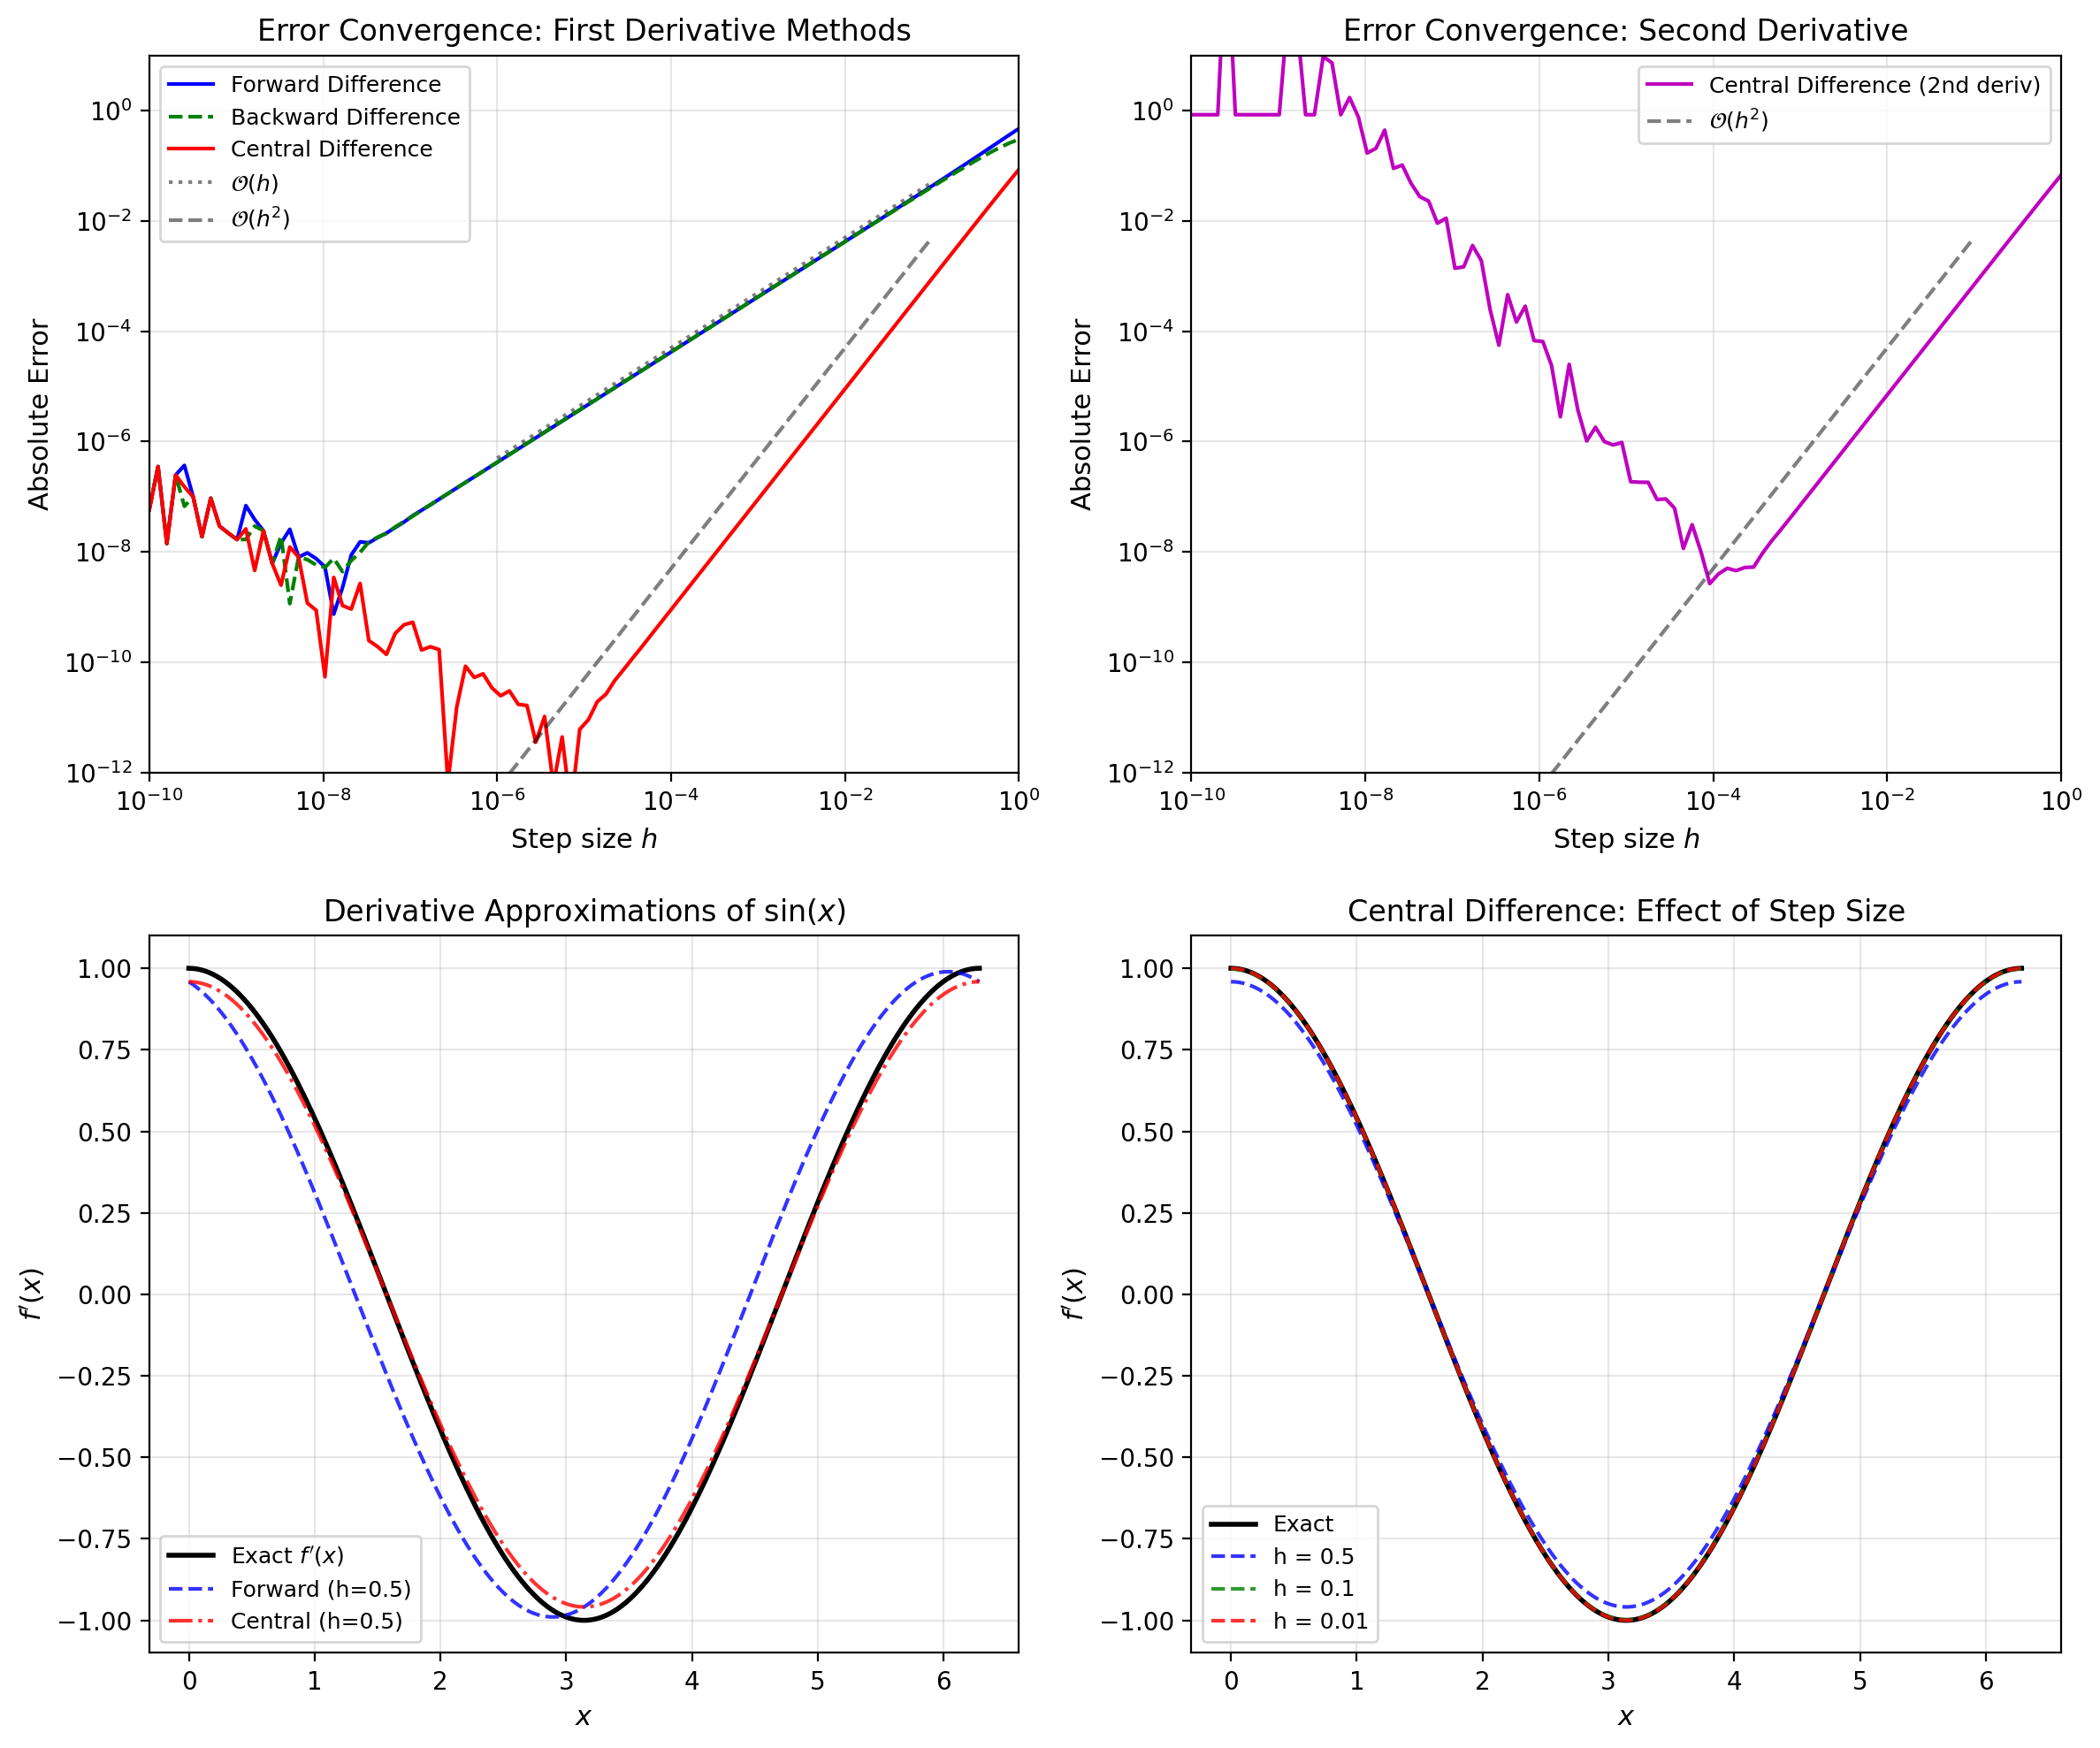


Plot saved to 'plot.png'


In [3]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Error convergence for first derivative methods
ax1 = axes[0, 0]
ax1.loglog(h_values, forward_errors, 'b-', label='Forward Difference', linewidth=1.5)
ax1.loglog(h_values, backward_errors, 'g--', label='Backward Difference', linewidth=1.5)
ax1.loglog(h_values, central_errors, 'r-', label='Central Difference', linewidth=1.5)

# Reference lines for convergence rates
h_ref = np.logspace(-6, -1, 50)
ax1.loglog(h_ref, h_ref * 0.5, 'k:', alpha=0.5, label=r'$\mathcal{O}(h)$')
ax1.loglog(h_ref, h_ref**2 * 0.5, 'k--', alpha=0.5, label=r'$\mathcal{O}(h^2)$')

ax1.set_xlabel('Step size $h$', fontsize=11)
ax1.set_ylabel('Absolute Error', fontsize=11)
ax1.set_title('Error Convergence: First Derivative Methods', fontsize=12)
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_xlim([1e-10, 1])
ax1.set_ylim([1e-12, 10])

# Plot 2: Second derivative error
ax2 = axes[0, 1]
ax2.loglog(h_values, second_deriv_errors, 'm-', label='Central Difference (2nd deriv)', linewidth=1.5)
ax2.loglog(h_ref, h_ref**2 * 0.5, 'k--', alpha=0.5, label=r'$\mathcal{O}(h^2)$')

ax2.set_xlabel('Step size $h$', fontsize=11)
ax2.set_ylabel('Absolute Error', fontsize=11)
ax2.set_title('Error Convergence: Second Derivative', fontsize=12)
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_xlim([1e-10, 1])
ax2.set_ylim([1e-12, 10])

# Plot 3: Derivative approximations over an interval
ax3 = axes[1, 0]
x = np.linspace(0, 2*np.pi, 200)
h_demo = 0.5

ax3.plot(x, f_prime(x), 'k-', label='Exact $f\'(x)$', linewidth=2)
ax3.plot(x, forward_difference(f, x, h_demo), 'b--', label=f'Forward (h={h_demo})', linewidth=1.5, alpha=0.8)
ax3.plot(x, central_difference(f, x, h_demo), 'r-.', label=f'Central (h={h_demo})', linewidth=1.5, alpha=0.8)

ax3.set_xlabel('$x$', fontsize=11)
ax3.set_ylabel('$f\'(x)$', fontsize=11)
ax3.set_title(f'Derivative Approximations of $\\sin(x)$', fontsize=12)
ax3.legend(loc='best', fontsize=9)
ax3.grid(True, alpha=0.3)

# Plot 4: Effect of step size on central difference accuracy
ax4 = axes[1, 1]
h_test = [0.5, 0.1, 0.01]
colors = ['blue', 'green', 'red']

ax4.plot(x, f_prime(x), 'k-', label='Exact', linewidth=2)
for h_val, color in zip(h_test, colors):
    ax4.plot(x, central_difference(f, x, h_val), '--', color=color, 
             label=f'h = {h_val}', linewidth=1.5, alpha=0.8)

ax4.set_xlabel('$x$', fontsize=11)
ax4.set_ylabel('$f\'(x)$', fontsize=11)
ax4.set_title('Central Difference: Effect of Step Size', fontsize=12)
ax4.legend(loc='best', fontsize=9)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('numerical_differentiation_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Conclusions

### Key Observations

1. **Convergence Rates**: The error plots confirm the theoretical convergence rates:
   - Forward and backward differences: $\mathcal{O}(h)$
   - Central differences: $\mathcal{O}(h^2)$

2. **Round-off Error Plateau**: For very small $h$ ($< 10^{-8}$), round-off errors dominate, causing the error to increase.

3. **Optimal Step Size**: The minimum error occurs around $h \approx 10^{-5}$ to $10^{-8}$, depending on the method.

4. **Central Difference Superiority**: Central differences achieve the same accuracy as forward/backward differences with a much larger step size, reducing round-off error effects.

### Practical Recommendations

- Use **central differences** when possible for better accuracy
- Choose $h \approx 10^{-5}$ to $10^{-8}$ for double precision
- For noisy data, larger $h$ may be preferable to smooth out noise
- Consider **Richardson extrapolation** or **complex step differentiation** for higher accuracy